# Lesson 22: High level plotting

(c) 2018 Justin Bois. With the exception of pasted graphics, where the source is noted, this work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

This document was prepared at [Caltech](http://www.caltech.edu) with financial support from the [Donna and Benjamin M. Rosen Bioengineering Center](http://rosen.caltech.edu).

<img src="caltech_rosen.png">

*This lesson was generated from a Jupyter notebook.  You can download the notebook [here](l22_high_level_plotting.ipynb).*

<br /> <br />

In [1]:
import pandas as pd

# Out main plotting package
import altair as alt

We have a couple nice data sets from the last few lessons, the data from the tongue strikes of frogs and facial matching data from people with sleep deprivation. We've learned how to use Pandas to handle the data sets and get what we want out of them. But I argue that what we want out of them most of the time is **plots**. Now is the time in the bootcamp where we learn how to take data set and plot them.

## High-level and low-level plotting packages

As a demonstration of what I mean by high-level and low-level plotting packages, let us first think about one of our tasks we did with Pandas with the facial matching data set. We computed the median percent correct for those with and without insomnia. Here's the code to do it.

In [2]:
df = pd.read_csv('data/gfmt_sleep.csv', na_values='*')
df['insomnia'] = df['sci'] <= 16

df.groupby('insomnia')['percent correct'].median()

insomnia
False    85.0
True     75.0
Name: percent correct, dtype: float64

Literally three lines of code. Now what if we tried to do it without Pandas? I won't even go through the many lines of code necessary to read in the data. Consider just this one line.
```python
df.groupby('insomnia')['percent correct'].median()
```
There are elementary tasks that go into it if we were to code it up without using Pandas's delicious functionality. We can loop over the rows in the `DataFrame` with a **`for`** loop, check to see what the value of the `insomnia` column is with an **`if`** statement, put the value in the `percent correct` field into an appropriate array based on whether or not the subject suffers from insomnia, and then, given those arrays, sort them and mind the middle value. Under the hood, all of those steps take place, but because we use Pandas's **high-level functionality**, those details are invisible to us, and glad we are of that.

Now, say we want to make a plot of some data. You can imagine that there are many many steps to building that. One way you could build a plot is to hand-generate an [SVG file](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics) that is a set of specifications for lines and circles and text and whatnot that comprises a plot. (I have actually done this before, writing a C program that hand-generated SVG, and it was paaaaainful.) That would be a very **low-level** way of generating a plot. Plotting libraries in Python usually take care of the rendering part for you, either rendering the plot as SVG, PDF, PNG, or other formats, including interactive ones that use [JavaScript](https://en.wikipedia.org/wiki/JavaScript) and [HTML Canvas](https://en.wikipedia.org/wiki/Canvas_element) that can be viewed in a browser. The plotting libraries then vary in their level of abstraction from the data set.

Lower-level plotting libraries typically are more customizable, but require more [**boilerplate code**](https://en.wikipedia.org/wiki/Boilerplate_code) to get your data plotted and are therefore more cumbersome. Higher-level plotting libraries aim to make it easier to move directly from a `DataFrame`. Because of this streamlining, though, they are often more difficult to customize.

Our debate in building this bootcamp was about whether to start with higher-level plotting or lower-level. We also thought about this when we were considering when to introduce `DataFrame`s. We decided that it is best to make things easy first, which enables you to do about 95% of what you want to do, and then bring in the lower-level concepts later so that you can do customization and tweaks. This is largely influenced by ideas from [Dave Robinson](http://varianceexplained.org), a former computational biologist and current data science educator, [this blog post](http://varianceexplained.org/r/teach-hard-way/) in particular. We a decidedly going high level to make it easier for you to make your computer an efficient and powerful research tool as fast as possible.

## The Python visualization landscape

There are many, many plotting packages available in Python. In a [talk at PyCon in 2017](https://www.youtube.com/watch?v=FytuB8nFHPQ), [Jake VanderPlas](http://vanderplas.com), who is one of the authors of [Altair](https://altair-viz.github.io), the main high-level plotting package we'll use in the bootcamp, gave an overview of the Python visualization landscape. That landscape is depicted below, taken from [this visualization of it](https://github.com/rougier/python-visualization-landscape) by [Nicolas Rougier](http://www.labri.fr/perso/nrougier/).

![python_viz_landscape](python_viz_landscape.png)

The landscape is divided into three main pods based on the low-level renderer of the graphics, JavaScript, [Matplotlib](https://matplotlib.org), and [OpenGL](https://www.opengl.org) (though Matplotlib is higher-level than JavaScript and OpenGL). We will not discuss packages based on [OpenGL]. Packages that use JavaScript for rendering are particularly well suited for interactivity in browsers. Interactivity and portability (accomplished by rendering in browsers) are key features of modern plotting libraries, so we will use primarily JavaScript-based plotting in the bootcamp (as I do in my own work).

The main plotting package we will use in the bootcamp is [Altair](https://altair-viz.github.io). It uses the [Vega/Vega-Lite](https://vega.github.io) visualization grammars, which interface to [d3.js](https://d3js.org), a fantastic library for interactive visualizations based on JavaScript. (The connection shown by the dashed line between Altair and Matplotlib is not really there any more.) Our major motivation for choosing Altair is that its grammar is clean and consistent. It also has good JupyterLab integration. This provides a good framework for building graphics.

Following is a brief discussion on other plotting libraries that we considered for this year's bootcamp and have been included in years past.

#### Low-level packages
- [Matplotlib](https://matplotlib.org) was originally developed by [John Hunter](https://en.wikipedia.org/wiki/John_D._Hunter), a neurobiologist, nearly two decades ago. It was one of the first serious Python-based plotting packages and today has the most widespread use. It is lower-level and can be difficult to wrangle to quickly get plots for your data. However, it is highly customizable and very feature rich. It is also the most widely-used Python-based plotting package.
- [Bokeh](https://bokeh.pydata.org/) is a newer library for generating interactive plots. Its grammar is clean, it has good documentation, and it being adapted for widespread use. We will use Bokeh later on in the bootcamp when we need the lower-level functionality, for example for displaying images.

#### High-level packages
- [Holoviews](http://holoviews.org) is an interesting high-level library. It's motto is "Stop plotting your data—annotate your data and let it visualize itself." The idea is that, given a `DataFrame`, you simply need to add a few annotations (Is a given column a dependent variable? An independent variable? Things like that.) to your `DataFrame`, and then you specify what kind of plot you want (like a scatter plot, histogram etc.) and the plot should flow naturally from the structure of the `DataFrame`. Holoviews is agnostic to renderers; it can use Matplotlib, Bokeh, or [Plotly](http://plot.ly). It is in many respects my high-level plotting package of choice.
- [Seaborn](https://seaborn.pydata.org) is built on Matplotlib and enables rapid generation of beautifully styled plots from `DataFrame`s. It is developed by [Michael Waskom](http://www.cns.nyu.edu/~mwaskom/), a neuroscientist, and also has widespread use in biology.

## Our first plot with Altair

Altair uses a [declarative paradigm](https://en.wikipedia.org/wiki/Declarative_programming), meaning that you tell Altair what *you want* as opposed to telling it what *to do*. For example, let's say I want to make a scatter plot of confidence when incorrect versus confidence when correct. We might expect some correlation here (people may just be confident in general, whether they are right or wrong), so this seems like something we would like to explore. So, let's just make the first plot, and I will discuss the syntax. For now, just note that we imported Altair as `alt`.

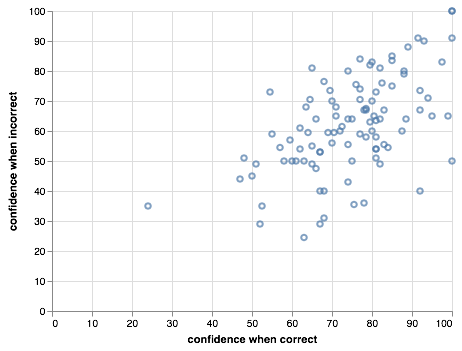

In [3]:
alt.Chart(df).mark_point().encode(x='confidence when correct',
                                  y='confidence when incorrect')

In looking at the above syntax, remember that after each dot (except the first one) is a method associated with the object that was created. In this way, the plot was built in steps.

1. `alt.Chart(df)` created a `Chart` object whose underlying data are in the `DataFrame` `df`.
2. `.mark_point()` specifies that the **marks** on the chart are points.
3. `.encode(x='confidence when correct', y='confidence when incorrect')` says that the positions of the points on the chart are encoded according to the `confidence when correct` and `confidence when incorrect`.

This is very much like English.
> "Altair, give my a plot of data from my data frame where the data are plotted as points, and the x-values are the confidence correct and the y-values are the confidence when incorrect."

Altair took care of the rest, like specifying plot dimensions, labeling the axes, having their ranges go from 0 to 100, stylizing the grid, etc. These can be adjusted, but at its basic level, this is how Altair makes a plot.

## The importance of tidy data frames

Given how Altair interpreted our commands, it might be clear for you now that Altair requires that the data frame you use to build the chart be [**tidy**](l20_split_apply_combine.html). The organization of tidy data is really what enables this high level plotting functionality. There is a well-specified organization of the data.

## Code style in plot specifications

Specifications of Altair plots involve lots of **method chaining** and can get unwieldy without a clear style. You can develop your own style, maybe reading [Trey Hunner's blog post again](http://treyhunner.com/2017/07/craft-your-python-like-poetry/). I like to do the following.

1. Put the `alt.Chart(df` on the first line.
2. The closed parenthesis of the preceding line is one indentation level in.
3. Any arguments of subsequent functions are given as kwargs two indentation levels in.

Here's an example for the chart we just created.

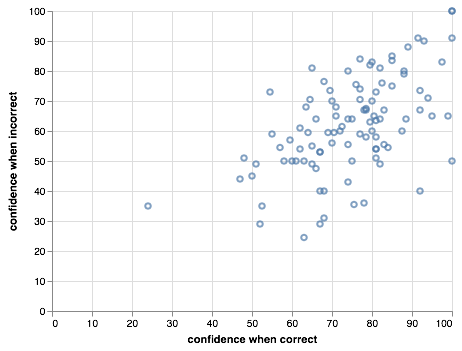

In [4]:
chart = alt.Chart(df
    ).mark_point(
    ).encode(
        x='confidence when correct',
        y='confidence when incorrect')

chart

If you adhere to a style, it makes your code cleaner and easier to read.

## Altair data types

When making a plot, we should specify the type of data we are encountering. For example, the `confidence when incorrect` consists of `float`s, so these are **quantitative**. By contrast, the `gender` column consists of only one of two strings. This column contains **nominative** data. The `sci` column consists of SCI scores, which can only take integer values. These data are not quantitative (in the sense of classifying data types), since they are discrete. Unlike the `gender` column, they do have an ordering, so the `sci` column contains **ordinal** data. Altair has a fourth data type, **temporal** which is used to describe columns in a data frame that have information about time.

Each data type has a shorthand that can be used in the specification. Here is a summary of the data types and their shorthand, taken largely from [Altair's docs](https://altair-viz.github.io/user_guide/encoding.html#data-types)

|Data Type|Shorthand Code|Description|
|:-- |:-- |:-- |
|quantitative|`Q`|continuous, real|
|ordinal|`O`|discrete, ordered|
|nominal|`N`|discrete, unordered category|
|temporal|`T`|time|

We can use the shorthand to specify data types by adding, e.g., `:Q` for quantitative data in an encoding. For example, a more complete specification for our plot is as follows (the output is the same, since Altair assumed a quantitative data type, but you should in general never count on Altair's inferences, but specify the data type yourself).

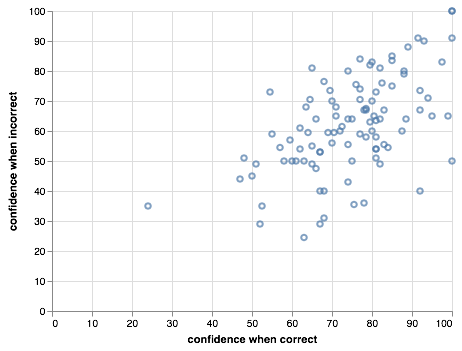

In [5]:
alt.Chart(df
    ).mark_point(
    ).encode(
        x='confidence when correct:Q',
        y='confidence when incorrect:Q')

## Altair marks

To specify the marks in an Altair chart, we use syntax like `mark_point()` or `mark_line()` to specify how the marks in the chart should appear. For example, if we wanted to make a strip plot of the confidence when incorrect values, we can use `mark_tick`.

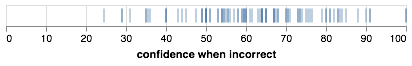

In [6]:
alt.Chart(df
    ).mark_tick(
    ).encode(x='confidence when incorrect:Q')

There are many marks, and they can be found in [Altair's docs](https://altair-viz.github.io/user_guide/marks.html#marks).

## Altair encodings

An **encoding** maps properties of the data to visual properties. In the first plot we made, we mapped the confidence when correct to the x-position of a mark. We call a mapping of data to a visual property an **encoding channel**. The channel I just described is an `x` channel. There are many more visual properties besides position of marks. You can find a complete list in the [Altair docs](https://altair-viz.github.io/user_guide/encoding.html#encoding-channels). `color` is a very commonly used encoding.

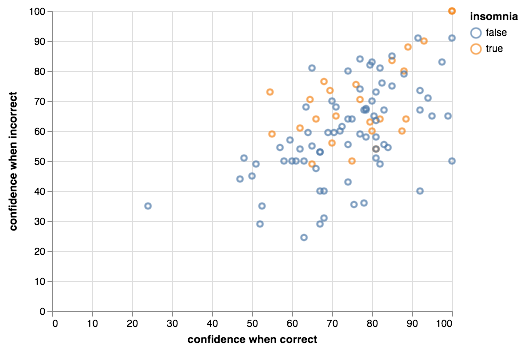

In [7]:
alt.Chart(df
    ).mark_point(
    ).encode(
        x='confidence when correct:Q',
        y='confidence when incorrect:Q',
        color='insomnia:N')

Notice that Altair automatically did the coloring and made a legend for you.

## Interactive plotting with Altair

To make a plot interactive, which allows zooming and in and and other actions, you can simply add `.intractive()` to your chained functions. The interactivity works in JupyterLab, but does not currently work when the Jupyter notebook is exported to HTML (so if you are reading the HTML version of this document, you are only seeing static plots), but if you save the plot as HTML (see below), the interactivity is retained.

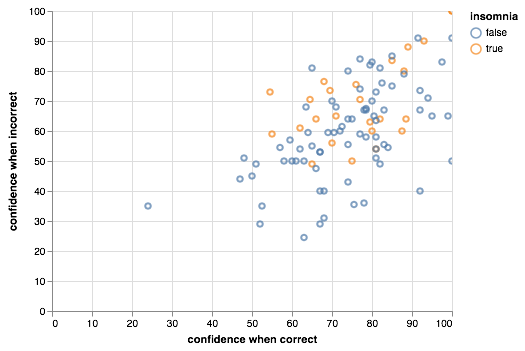

In [8]:
alt.Chart(df
    ).mark_point(
    ).encode(
        x='confidence when correct:Q',
        y='confidence when incorrect:Q',
        color='insomnia:N'
    ).interactive()

Of particular use are **tooltips** which give pop-up information when you hover over a mark on a chart. For example, we might like to know the gender and percent correct for each data point. We can add this with a `tooltip` encoding.

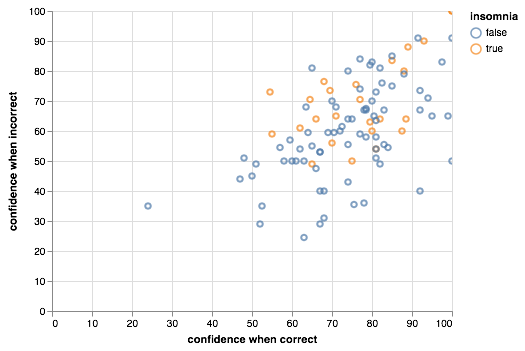

In [9]:
alt.Chart(df
    ).mark_point(
    ).encode(
        x='confidence when correct:Q', 
        y='confidence when incorrect:Q',
        color='insomnia:N',
        tooltip=['gender', 'insomnia', 'percent correct']
    ).interactive()

## Programmatically saving Altair charts

After you create your chart, you can save it to a variety of formats. Most commonly you would save them as PNG (for presentations), SVG (for publications in the paper of the past), and HTML (for the paper of the future). To do this, you can use the `save()` method of the `Chart`. It will automatically infer the file format you want based on the suffix of the file name choose to save the chart to. Note that in order to save as SVG, you need to have performed the [optional installations of lesson 0](l00_configuring_your_computer.html#Optional-installations).

In [10]:
chart = alt.Chart(df
    ).mark_point(
    ).encode(
        x='confidence when correct:Q',
        y='confidence when incorrect:Q',
        color='insomnia:N',
        tooltip=['gender', 'insomnia', 'percent correct']
    ).interactive()

chart.save('confidence_scatter.html')